In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [15]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [16]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


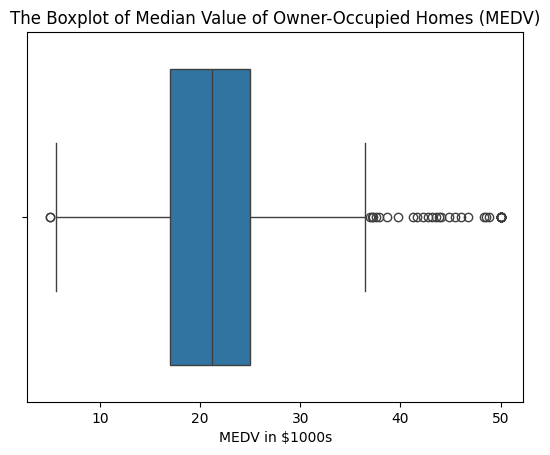

In [17]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title('The Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV in $1000s')
plt.show()

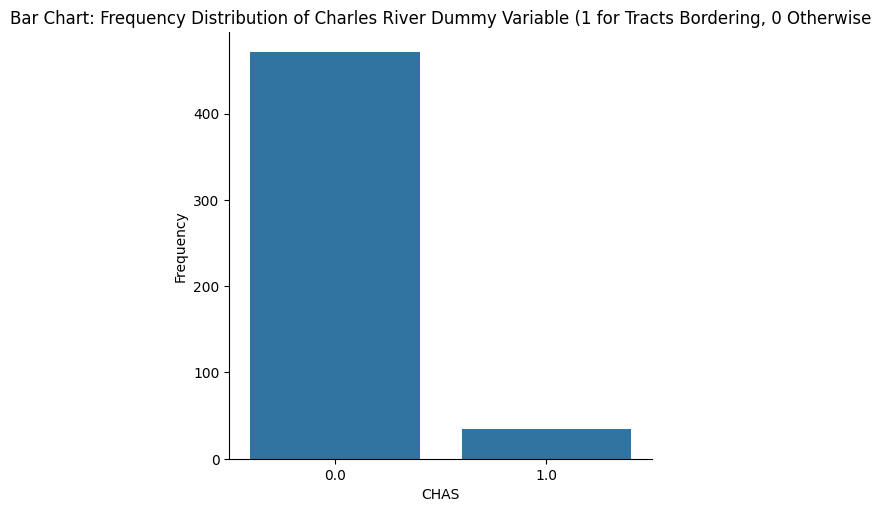

In [18]:
ax = sns.catplot(x='CHAS',kind='count', data=boston_df)
plt.title('Bar Chart: Frequency Distribution of Charles River Dummy Variable (1 for Tracts Bordering, 0 Otherwise')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()

In [20]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

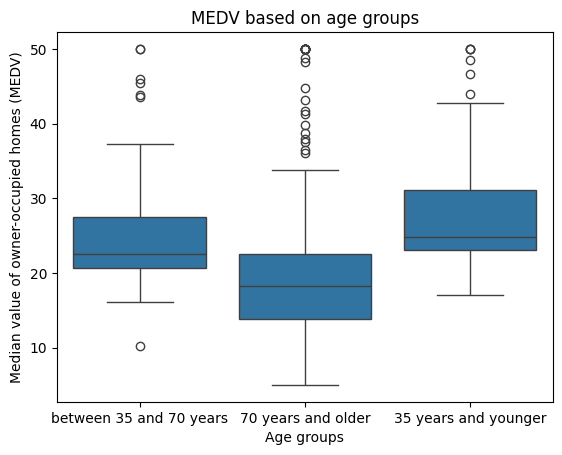

In [21]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('MEDV based on age groups')
plt.xlabel('Age groups')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

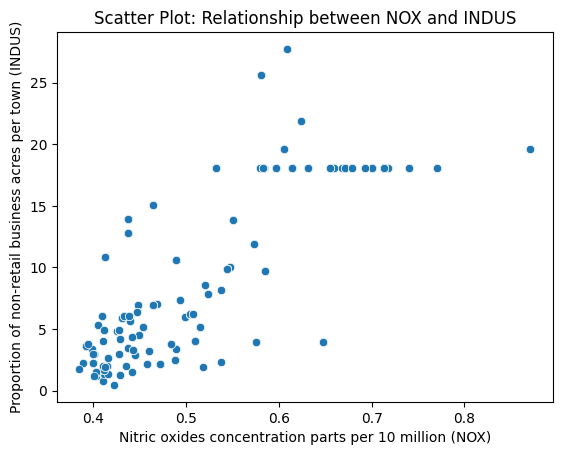

In [22]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot: Relationship between NOX and INDUS')
plt.xlabel('Nitric oxides concentration parts per 10 million (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()

In [23]:

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

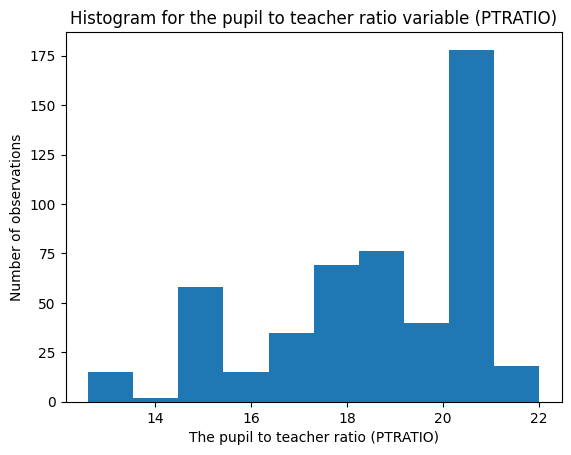

In [24]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('The pupil to teacher ratio (PTRATIO)')
plt.ylabel('Number of observations')
plt.title("Histogram for the pupil to teacher ratio variable (PTRATIO)")
plt.show()

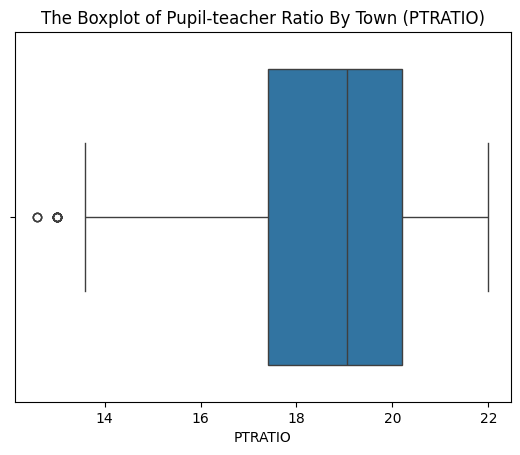

In [25]:
ax = sns.boxplot(x='PTRATIO', data=boston_df)
plt.title('The Boxplot of Pupil-teacher Ratio By Town (PTRATIO)')
plt.xlabel('PTRATIO')
plt.show()

In [26]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median') # since the data is skewed, we use median as center and it is greater than alpha value 0.05,


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True) # since p-value is less than alpha value 0.05, we reject the null hypothesis,


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)